In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [38]:
data=pd.read_excel('Mall_Customers 2.xlsx')

In [39]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,20,15,39
1,2,Male,20,15,81
2,3,Female,20,16,6
3,4,Female,20,16,77
4,5,Female,20,17,40


In [40]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,10.00000,10.0,10.000000,10.000000
mean,5.50000,20.0,17.000000,49.400000
std,3.02765,0.0,1.490712,35.094159
min,1.00000,20.0,15.000000,3.000000
25%,3.25000,20.0,16.000000,14.250000
50%,5.50000,20.0,17.000000,56.000000
75%,7.75000,20.0,18.000000,76.750000
max,10.00000,20.0,19.000000,94.000000


Text(0.5, 1.0, 'Distribution of Gender')

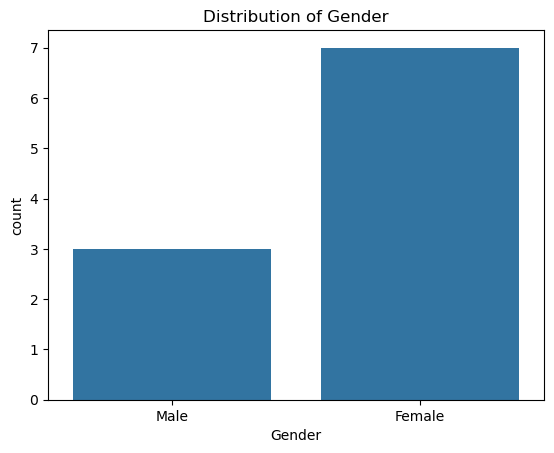

In [41]:
sns.countplot(x='Gender',data=data)
plt.title('Distribution of Gender')

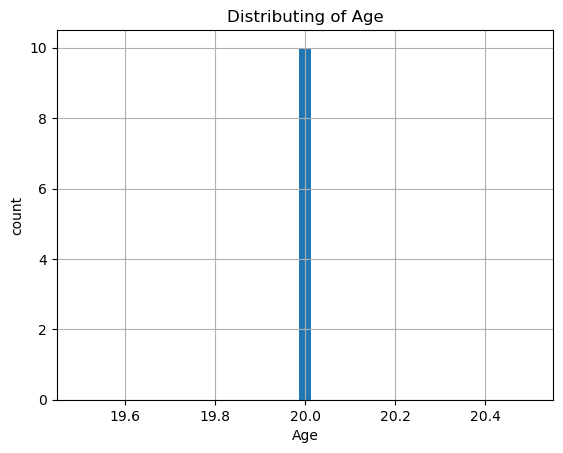

In [42]:
data.hist('Age',bins=35);
plt.title('Distributing of Age');
plt.xlabel('Age');
plt.ylabel('count');

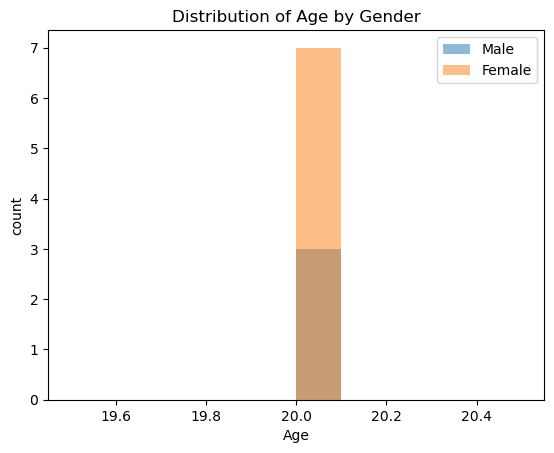

In [43]:
plt.hist('Age', data=data[data['Gender']=='Male'],alpha=0.5,label='Male');
plt.hist('Age', data=data[data['Gender']=='Female'],alpha=0.5,label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.ylabel('count');
plt.legend();

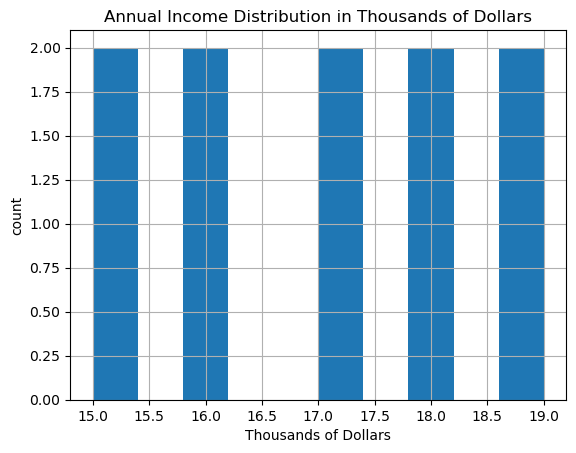

In [44]:
data.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');
plt.ylabel('count');

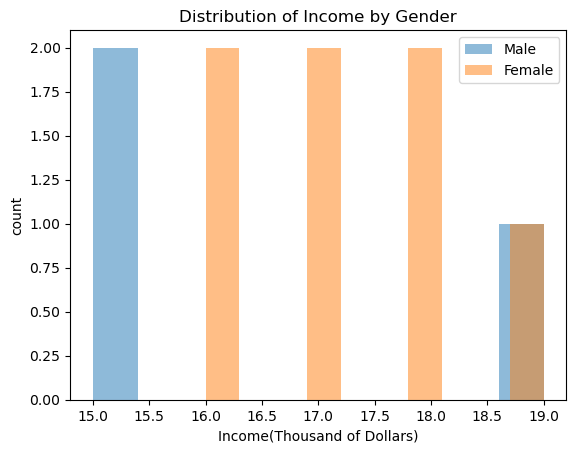

In [45]:
plt.hist('Annual Income (k$)',data=data[data['Gender'] == 'Male'],alpha=0.5,label='Male');
plt.hist('Annual Income (k$)',data=data[data['Gender'] == 'Female'],alpha=0.5,label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income(Thousand of Dollars)');
plt.ylabel('count');
plt.legend();

In [46]:
male_customers=data[data['Gender']=='Male']
female_customers=data[data['Gender']=='Female']
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

41.0
53.0


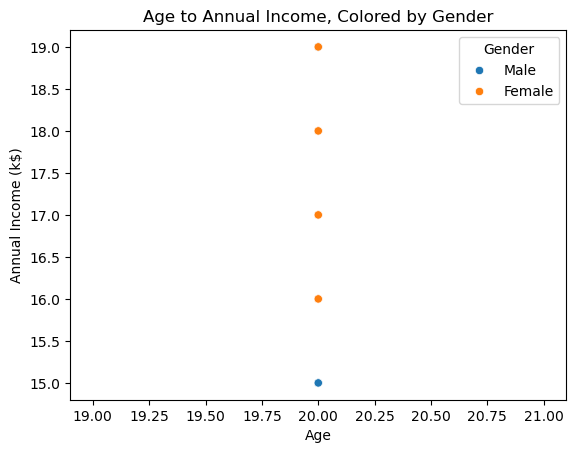

In [47]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age to Annual Income, Colored by Gender')

# Show the plot
plt.show()

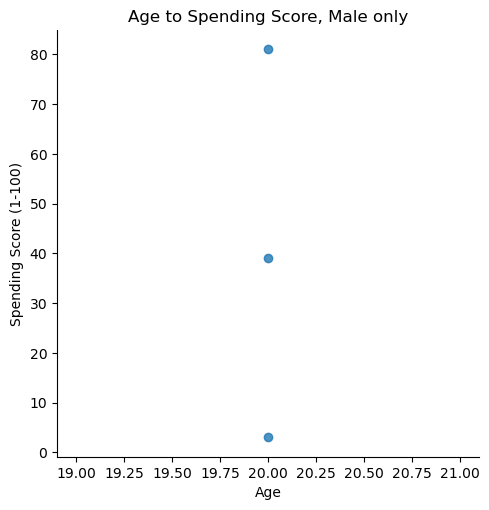

In [48]:
# Assuming you have a DataFrame named 'data' and want to filter for male customers
male_customers = data[data['Gender'] == 'Male']

# Create the lmplot
sns.lmplot(x='Age', y='Spending Score (1-100)', data=male_customers)
plt.title('Age to Spending Score, Male only')

# Show the plot
plt.show()

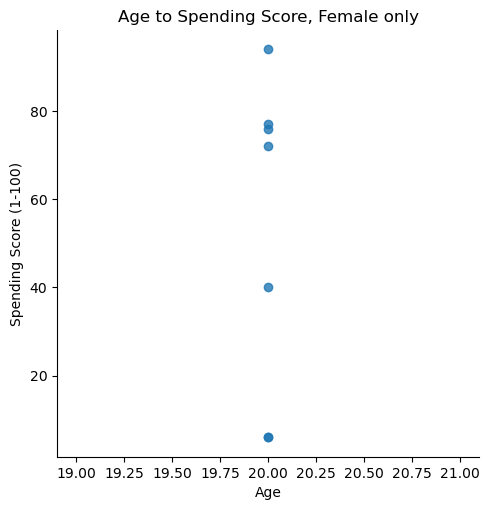

In [49]:
# Assuming you have a DataFrame named 'data' and want to filter for male customers
female_customers = data[data['Gender'] == 'Female']

# Create the lmplot
sns.lmplot(x='Age', y='Spending Score (1-100)', data=female_customers)
plt.title('Age to Spending Score, Female only')

# Show the plot
plt.show()

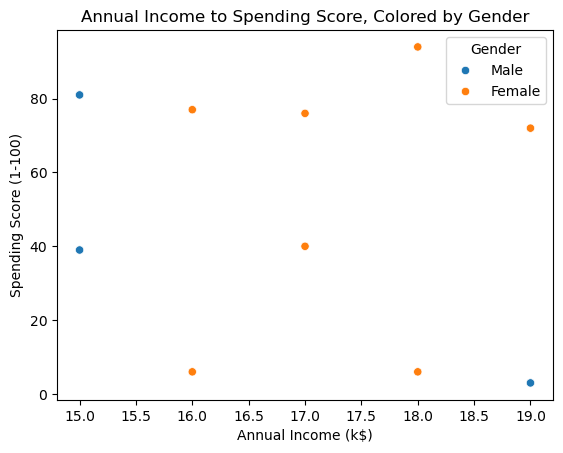

In [50]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income to Spending Score, Colored by Gender')

# Show the plot
plt.show()

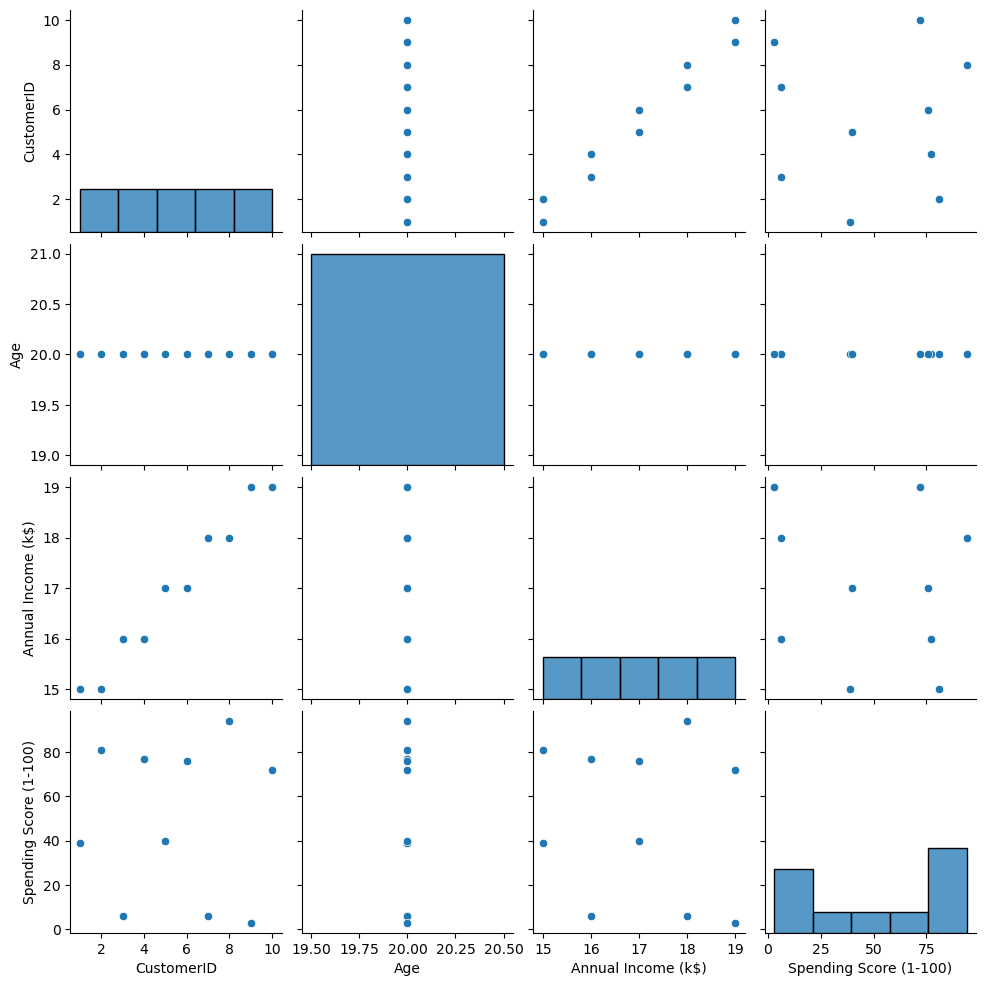

In [51]:
sns.pairplot(data)
plt.show()

In [52]:
x=data.iloc[:,[3,4]].values
print(x.shape)

(10, 2)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

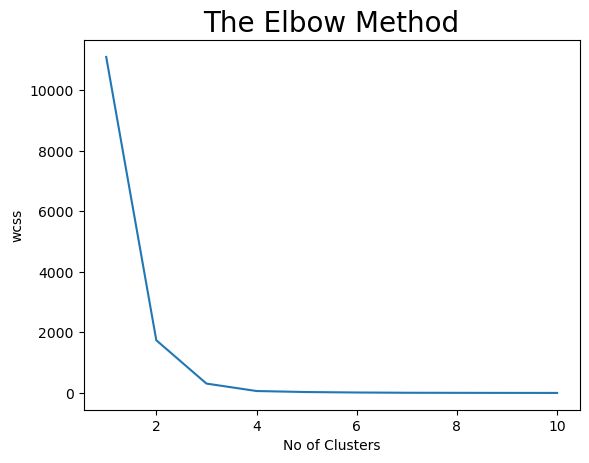

In [53]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


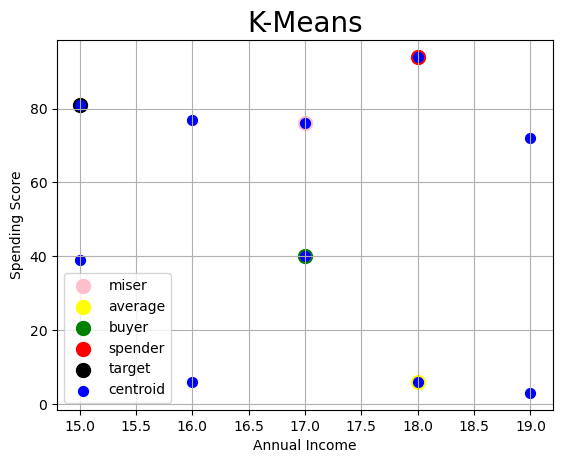

In [54]:
km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='pink',label='miser')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='yellow',label='average')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='buyer')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='red',label='spender')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='black',label='target')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')
plt.title('K-Means',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid() 
plt.show()